In [1]:
import pandas as pd
from IPython.display import display, HTML
from assembly_tools import load_experiment_results_3
from matplotlib import patches, path
import matplotlib.pyplot as plt

### Assembly of experimental results 3

In [2]:
res,namings = load_experiment_results_3("/home/datasets4/stein/rivers/paper_result_storage/new_runs/exp3/")

In [12]:
which = "Max F1"

In [13]:
stack = []
for x in range(len(res)):
    a = res[x][res[x]["Metric"] == which].T
    a = a.loc[[x for x in a.index if ("last" not in x) and ("Metric" not in x)]].values[0]
    b = [namings[x],a[0]]
    stack.append(b)

In [14]:
stack = pd.DataFrame(stack).loc[[7,1,0,3,8,2,9,5,4,6]]

stack[0] = (
    "Close 3",
    "Close 5",
    "Root Cause 3",
    "Root Cause 5",
    "Random+1 3",
    "Random+1 5",
    "Random 3",
    "Random 5",
    "Confounder 3",
    "COnfounder 5"
)

In [15]:
previous =  pd.read_csv("exp_1_out_max_individual_f1.csv", index_col=0)

In [16]:
# Extracted by hand from exp1 table :)
stack["Before finetuning" ] = previous[-2:].max().values[:-1]

stack["maximum"] = previous.max().values[:-1]

In [17]:
df = stack 
df.reset_index(drop=True, inplace=True)
df.columns = ["name", "After", "Before", "Previous best"]

# reoder columns
df = df[["name", "Before", "After", "Previous best"]]
df["Increase"] = df["After"] - df["Before"]
df["Increase on maxi"] = df["After"] - df["Previous best"]


/tmp/ipykernel_629445/2406390634.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Increase"] = df["After"] - df["Before"]
/tmp/ipykernel_629445/2406390634.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Increase on maxi"] = df["After"] - df["Previous best"]


In [18]:
display(df)

,name,Before,After,Previous best,Increase,Increase on maxi
0,Close 3,0.515678,0.651564,0.714472,0.135886,-0.062908
1,Close 5,0.376817,0.637003,0.552918,0.260185,0.084085
2,Root Cause 3,0.526165,0.726941,0.751250,0.200776,-0.024308
3,Root Cause 5,0.397922,0.649607,0.626405,0.251685,0.023202
4,Random+1 3,0.543700,0.477936,0.567121,-0.065764,-0.089185
5,Random+1 5,0.359149,0.578377,0.492439,0.219228,0.085938
6,Random 3,0.518118,0.651217,0.713116,0.133099,-0.061899
7,Random 5,0.383243,0.635900,0.542204,0.252657,0.093696
8,Confounder 3,0.552083,0.542553,0.615385,-0.009530,-0.072831
9,COnfounder 5,0.367844,0.482993,0.497648,0.115149,-0.014654


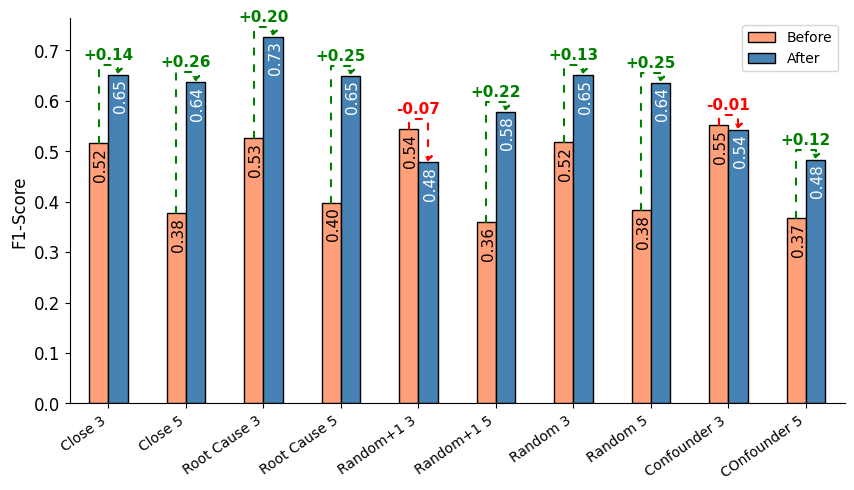

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

# dont plot increase
ret = df[["Before", "After"]].plot(
    kind="bar", ax=ax, color=["#FFA07A", "#4682B4"], width=0.5, edgecolor="black"
)

# for each bar in the plot, add the value on below it
for i, p in enumerate(ax.patches):
    ax.annotate(
        text=f"{p.get_height():.2f}",
        xy=(p.get_x() + 0.055, p.get_height() - 0.07),
        fontsize=11,
        rotation=90,
        color="white" if i > 9 else "black",
    )

# draw an fancy arrow between the two bars
for i in range(len(df)):
    x_s = ax.patches[i].get_x() + (ax.patches[i].get_width() / 2)
    x_e = ax.patches[i + len(df)].get_x() + ax.patches[i + len(df)].get_width() / 2
    y_s = ax.patches[i].get_height()
    y_e = ax.patches[i + len(df)].get_height()

    style = "Simple, tail_width=0.5, head_width=4, head_length=8"
    kw = dict(arrowstyle=style, color="k")

    # compute the path coordinates like
    #  |--|
    #  |  |
    #  |  b
    #  a

    increase = df["Increase"].iloc[i]

    if increase > 0:
        top = y_s + increase + 0.02
        text_color = "green"
    else:
        top = y_s + 0.02
        text_color = "red"
    to_path = path.Path(
        [
            (x_s, y_s),
            (x_s, top),
            (x_e, top),
            (x_e, y_e + 0.002),
        ]
    )

    # path = [(x_s, y_s), (x_s, y_s + 0.01), (x_e, y_e + 0.01), (x_e, y_e)]

    arrow = patches.FancyArrowPatch(
        # (x_s, y_s),
        # (x_e, y_e + 0.01),
        path=to_path,
        arrowstyle="-|>, head_length=2.5, head_width=2.5",
        color=text_color,
        lw=1.5,
        linestyle=(0, (3, 5)),
    )
    ax.add_patch(arrow)

    # add the increase value on top of the arrow
    sign = "+" if increase > 0 else ""
    ax.annotate(
        text=f"{sign}{increase:.2f}",
        xy=(x_s + (x_e - x_s) / 2, top + 0.01),
        fontsize=11,
        color=text_color,
        ha="center",
        weight="bold",
    )


# set the x-axis labels to be the country names
ax.set_xticklabels(df["name"], rotation=35, ha="right", fontsize=10)

ax.set_ylabel("F1-Score", fontsize=12)

# set the yaxis tick labels size
ax.yaxis.set_tick_params(labelsize=12)
# ax.xaxis.set_tick_params(labelsize=12)

# disable top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig("resources/fine_tune.pdf", dpi=300, bbox_inches="tight", pad_inches=0.1)

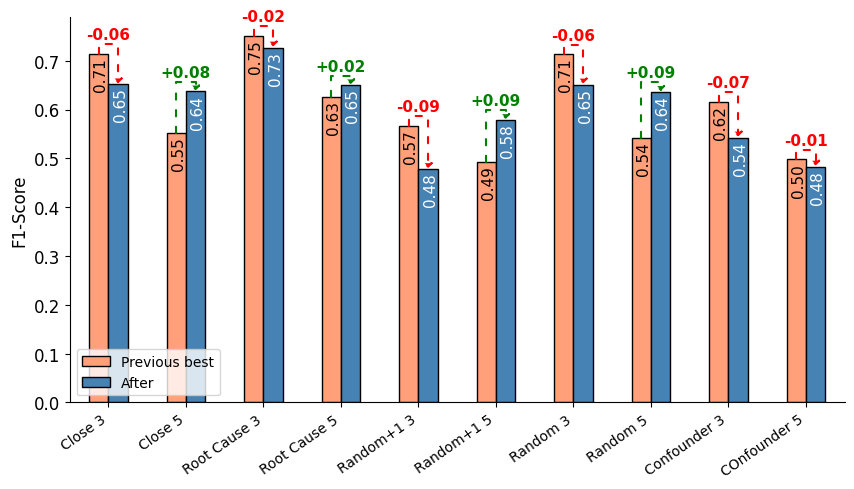

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

# dont plot increase
ret = df[["Previous best", "After"]].plot(
    kind="bar", ax=ax, color=["#FFA07A", "#4682B4"], width=0.5, edgecolor="black"
)

# for each bar in the plot, add the value on below it
for i, p in enumerate(ax.patches):
    ax.annotate(
        text=f"{p.get_height():.2f}",
        xy=(p.get_x() + 0.055, p.get_height() - 0.07),
        fontsize=11,
        rotation=90,
        color="white" if i > 9 else "black",
    )

# draw an fancy arrow between the two bars
for i in range(len(df)):
    x_s = ax.patches[i].get_x() + (ax.patches[i].get_width() / 2)
    x_e = ax.patches[i + len(df)].get_x() + ax.patches[i + len(df)].get_width() / 2
    y_s = ax.patches[i].get_height()
    y_e = ax.patches[i + len(df)].get_height()

    style = "Simple, tail_width=0.5, head_width=4, head_length=8"
    kw = dict(arrowstyle=style, color="k")

    # compute the path coordinates like
    #  |--|
    #  |  |
    #  |  b
    #  a

    increase = df["Increase on maxi"].iloc[i]

    if increase > 0:
        top = y_s + increase + 0.02
        text_color = "green"
    else:
        top = y_s + 0.02
        text_color = "red"
    to_path = path.Path(
        [
            (x_s, y_s),
            (x_s, top),
            (x_e, top),
            (x_e, y_e + 0.002),
        ]
    )

    # path = [(x_s, y_s), (x_s, y_s + 0.01), (x_e, y_e + 0.01), (x_e, y_e)]

    arrow = patches.FancyArrowPatch(
        # (x_s, y_s),
        # (x_e, y_e + 0.01),
        path=to_path,
        arrowstyle="-|>, head_length=2.5, head_width=2.5",
        color=text_color,
        lw=1.5,
        linestyle=(0, (3, 5)),
    )
    ax.add_patch(arrow)

    # add the increase value on top of the arrow
    sign = "+" if increase > 0 else ""
    ax.annotate(
        text=f"{sign}{increase:.2f}",
        xy=(x_s + (x_e - x_s) / 2, top + 0.01),
        fontsize=11,
        color=text_color,
        ha="center",
        weight="bold",
    )


# set the x-axis labels to be the country names
ax.set_xticklabels(df["name"], rotation=35, ha="right", fontsize=10)

ax.set_ylabel("F1-Score", fontsize=12)

# set the yaxis tick labels size
ax.yaxis.set_tick_params(labelsize=12)
# ax.xaxis.set_tick_params(labelsize=12)

# disable top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend(loc=3)
fig.savefig("resources/fine_tune_2.pdf", dpi=300, bbox_inches="tight", pad_inches=0.1)